In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/LDS8_DinhVietHa/LDS8_DinhVietHa_thi/'

/content/gdrive/My Drive/LDS8_DinhVietHa/LDS8_DinhVietHa_thi


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
data = pd.read_csv("./MELBOURNE_HOUSE_PRICES_LESS.csv")

In [ ]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [ ]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council
63022,Williams Landing,1 Diadem Wy,4,h,NaN,SP,Aussie,31/03/2018,3027,Western Metropolitan,1999,17.6,Wyndham City Council


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [ ]:
data.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Postcode         False
Regionname       False
Propertycount    False
Distance         False
CouncilArea      False
dtype: bool

In [ ]:
data.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


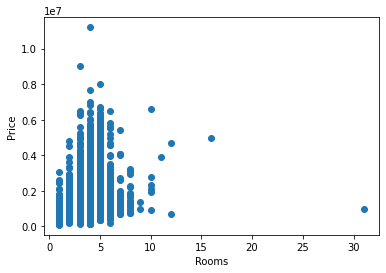

In [ ]:
plt.scatter(x=data['Rooms'], y=data['Price'])
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()

The graph above shows that the more rooms, the higher price, neglected of special circumstances. Most houses have under 5-6 rooms.

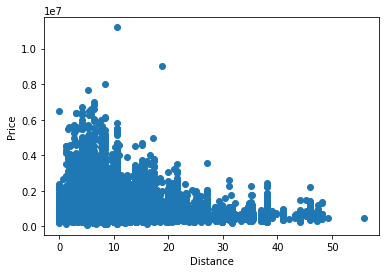

In [ ]:
plt.scatter(x=data['Distance'], y=data['Price'])
plt.xlabel("Distance")
plt.ylabel("Price")
plt.show()

The graph above shows that the shorter the distance, the higher the price.

In [ ]:
data.groupby(by='Method').count()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
Method,,,,,,,,,,,,
PI,9790,9790,9790,9790,5940,9790,9790,9790,9790,9790,9790,9790
PN,651,651,651,651,0,651,651,651,651,651,651,651
S,34063,34063,34063,34063,30624,34063,34063,34063,34063,34063,34063,34063
SA,416,416,416,416,365,416,416,416,416,416,416,416
SN,2674,2674,2674,2674,0,2674,2674,2674,2674,2674,2674,2674
SP,8916,8916,8916,8916,6480,8916,8916,8916,8916,8916,8916,8916
SS,73,73,73,73,0,73,73,73,73,73,73,73
VB,5956,5956,5956,5956,5024,5956,5956,5956,5956,5956,5956,5956
W,484,484,484,484,0,484,484,484,484,484,484,484


In [ ]:
data.groupby(by="Type").count()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
Type,,,,,,,,,,,,
h,45053,45053,45053,34161,45053,45053,45053,45053,45053,45053,45053,45053
t,6315,6315,6315,4980,6315,6315,6315,6315,6315,6315,6315,6315
u,11655,11655,11655,9292,11655,11655,11655,11655,11655,11655,11655,11655


Most houses were sold by method S, which outnumbered other methods.

In [ ]:
# only need to scale price and propertycount for non-null dataset, no need to scale for null dataset

Scale Price and Propertycount feature

In [ ]:
price_propertycount = data[['Rooms','Price', 'Propertycount','Distance']]

In [ ]:
scaler = RobustScaler()

In [ ]:
print(scaler.fit(price_propertycount))

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)


In [ ]:
price_propertycount_scaled = scaler.transform(price_propertycount)
price_propertycount_scaled[:5]

array([[ 0.        ,  1.1       , -0.4602122 , -0.86597938],
       [ 0.        ,  0.65      , -0.4602122 , -0.86597938],
       [ 0.        ,  0.98333333, -0.4602122 , -0.86597938],
       [ 0.        ,  1.14166667, -0.87068966, -0.40206186],
       [-1.        , -0.26666667, -0.55222149, -0.10309278]])

In [ ]:
price_propertycount_scaled = pd.DataFrame(price_propertycount_scaled, columns=['Rooms','Price','Propertycount','Distance'])

In [ ]:
data_scaled = data
data_scaled[['Rooms','Price','Propertycount','Distance']] = price_propertycount_scaled
data_scaled.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,0.0,h,1.100000,S,Jellis,1/04/2017,3067,Northern Metropolitan,-0.460212,-0.865979,Yarra City Council
1,Abbotsford,59A Turner St,0.0,h,0.650000,S,Marshall,1/04/2017,3067,Northern Metropolitan,-0.460212,-0.865979,Yarra City Council
2,Abbotsford,119B Yarra St,0.0,h,0.983333,S,Nelson,1/04/2017,3067,Northern Metropolitan,-0.460212,-0.865979,Yarra City Council
3,Aberfeldie,68 Vida St,0.0,h,1.141667,S,Barry,1/04/2017,3040,Western Metropolitan,-0.870690,-0.402062,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,-1.0,h,-0.266667,S,Nelson,1/04/2017,3042,Western Metropolitan,-0.552221,-0.103093,Moonee Valley City Council


remove Suburb, Address, SellerG, Date, Postcode

In [ ]:
scaled_data = data_scaled.drop(columns=['Suburb','Address','SellerG','Date','Postcode'])
scaled_data.head()

,Rooms,Type,Price,Method,Regionname,Propertycount,Distance,CouncilArea
0,0.0,h,1.100000,S,Northern Metropolitan,-0.460212,-0.865979,Yarra City Council
1,0.0,h,0.650000,S,Northern Metropolitan,-0.460212,-0.865979,Yarra City Council
2,0.0,h,0.983333,S,Northern Metropolitan,-0.460212,-0.865979,Yarra City Council
3,0.0,h,1.141667,S,Western Metropolitan,-0.870690,-0.402062,Moonee Valley City Council
4,-1.0,h,-0.266667,S,Western Metropolitan,-0.552221,-0.103093,Moonee Valley City Council


Encode categorical text data

In [ ]:
#type_region = scaled_data[['Type','Method','Regionname', 'CouncilArea']]
encoder = OneHotEncoder(drop='first')

In [ ]:
types = scaled_data[['Type']]
encoder.fit(types)
types = encoder.transform(types).toarray()
types[:5]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
types[:10]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# h = [0,0], t = [1,0],  u = [0,1]
encoded_types = pd.DataFrame(types,columns=['Type t','Type u'])
encoded_types.head()

,Type t,Type u
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
scaled_encode_data = pd.concat([scaled_data, encoded_types],axis=1)
scaled_encode_data = scaled_encode_data.drop(columns=['Type'])
scaled_encode_data.head(10) 

,Rooms,Price,Method,Regionname,Propertycount,Distance,CouncilArea,Type t,Type u
0,0.0,1.100000,S,Northern Metropolitan,-0.460212,-0.865979,Yarra City Council,0.0,0.0
1,0.0,0.650000,S,Northern Metropolitan,-0.460212,-0.865979,Yarra City Council,0.0,0.0
2,0.0,0.983333,S,Northern Metropolitan,-0.460212,-0.865979,Yarra City Council,0.0,0.0
3,0.0,1.141667,S,Western Metropolitan,-0.870690,-0.402062,Moonee Valley City Council,0.0,0.0
4,-1.0,-0.266667,S,Western Metropolitan,-0.552221,-0.103093,Moonee Valley City Council,0.0,0.0
5,-1.0,-0.500000,S,Western Metropolitan,-0.552221,-0.103093,Moonee Valley City Council,1.0,0.0
6,-1.0,-0.483333,S,Western Metropolitan,-0.552221,-0.103093,Moonee Valley City Council,0.0,1.0
7,0.0,-0.191667,SP,Western Metropolitan,-0.552221,-0.103093,Moonee Valley City Council,0.0,0.0
8,3.0,NaN,PI,Western Metropolitan,-0.811671,0.268041,Brimbank City Council,0.0,0.0
9,0.0,1.825000,S,Southern Metropolitan,-0.582725,-0.865979,Port Phillip City Council,0.0,0.0


In [ ]:
data['Type'][:10]

0    h
1    h
2    h
3    h
4    h
5    t
6    u
7    h
8    h
9    h
Name: Type, dtype: object

In [ ]:
#type_region_encoded = encoder.transform(type_region).toarray()
#type_region_encoded[:5]

In [ ]:
#encoded_type = pd.DataFrame(type_region_encoded)
#encoded_type.head()

In [ ]:
method = scaled_data[['Method']]
encoder.fit(method)
method = encoder.transform(method).toarray()
method[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]])

In [ ]:
encoded_methods = pd.DataFrame(method)
scaled_encode_data = pd.concat([scaled_encode_data, encoded_methods],axis=1)
scaled_encode_data = scaled_encode_data.drop(columns=['Method'])
scaled_encode_data.head(10)

,Rooms,Price,Regionname,Propertycount,Distance,CouncilArea,Type t,Type u,0,1,2,3,4,5,6,7
0,0.0,1.100000,Northern Metropolitan,-0.460212,-0.865979,Yarra City Council,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.650000,Northern Metropolitan,-0.460212,-0.865979,Yarra City Council,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.983333,Northern Metropolitan,-0.460212,-0.865979,Yarra City Council,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.141667,Western Metropolitan,-0.870690,-0.402062,Moonee Valley City Council,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,-0.266667,Western Metropolitan,-0.552221,-0.103093,Moonee Valley City Council,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-1.0,-0.500000,Western Metropolitan,-0.552221,-0.103093,Moonee Valley City Council,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-1.0,-0.483333,Western Metropolitan,-0.552221,-0.103093,Moonee Valley City Council,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,-0.191667,Western Metropolitan,-0.552221,-0.103093,Moonee Valley City Council,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,3.0,NaN,Western Metropolitan,-0.811671,0.268041,Brimbank City Council,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.825000,Southern Metropolitan,-0.582725,-0.865979,Port Phillip City Council,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data['Method'].unique().tolist()

['S', 'SP', 'PI', 'SN', 'VB', 'PN', 'SA', 'W', 'SS']

In [ ]:
data['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'South-Eastern Metropolitan',
       'Eastern Metropolitan', 'Northern Victoria', 'Western Victoria',
       'Eastern Victoria'], dtype=object)

In [ ]:
region = scaled_data[['Regionname']]
encoder.fit(region)
region = encoder.transform(region).toarray()
region[:10]

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [ ]:
encoded_region = pd.DataFrame(region)
scaled_encode_data = pd.concat([scaled_encode_data, encoded_region],axis=1)
scaled_encode_data = scaled_encode_data.drop(columns=['Regionname'])
scaled_encode_data.head(10)

,Rooms,Price,Propertycount,Distance,CouncilArea,Type t,Type u,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6
0,0.0,1.100000,-0.460212,-0.865979,Yarra City Council,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.650000,-0.460212,-0.865979,Yarra City Council,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.983333,-0.460212,-0.865979,Yarra City Council,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.141667,-0.870690,-0.402062,Moonee Valley City Council,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.0,-0.266667,-0.552221,-0.103093,Moonee Valley City Council,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-1.0,-0.500000,-0.552221,-0.103093,Moonee Valley City Council,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,-1.0,-0.483333,-0.552221,-0.103093,Moonee Valley City Council,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,-0.191667,-0.552221,-0.103093,Moonee Valley City Council,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,3.0,NaN,-0.811671,0.268041,Brimbank City Council,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.825000,-0.582725,-0.865979,Port Phillip City Council,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
len(data['CouncilArea'].unique())

34

In [ ]:
pretty_data = scaled_encode_data.drop(columns=['CouncilArea'])

In [ ]:
pretty_data.head(10)

,Rooms,Price,Propertycount,Distance,Type t,Type u,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6
0,0.0,1.100000,-0.460212,-0.865979,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.650000,-0.460212,-0.865979,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.983333,-0.460212,-0.865979,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.141667,-0.870690,-0.402062,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.0,-0.266667,-0.552221,-0.103093,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-1.0,-0.500000,-0.552221,-0.103093,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,-1.0,-0.483333,-0.552221,-0.103093,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,-0.191667,-0.552221,-0.103093,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,3.0,NaN,-0.811671,0.268041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.825000,-0.582725,-0.865979,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
pretty_data_train = pretty_data.dropna(how='any',axis=0)
pretty_data_predict = pretty_data[pretty_data['Price'].isnull() == True]

In [ ]:
pretty_data_predict.head()

,Rooms,Price,Propertycount,Distance,Type t,Type u,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6
8,3.0,NaN,-0.811671,0.268041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15,1.0,NaN,0.138428,0.422680,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24,1.0,NaN,-0.620524,-0.123711,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29,1.0,NaN,-0.939158,0.525773,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38,0.0,NaN,0.168103,-0.175258,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
pretty_data_predict.shape

(14590, 21)

In [ ]:
pretty_data_train.shape

(48433, 21)

In [ ]:
X_train = pretty_data_train.drop(columns='Price')
y_train = pretty_data_train['Price']

Building Model

In [ ]:
n_cols = X_train.shape[1]
n_cols

20

In [ ]:
model = Sequential()

model.add(Dense(12, activation='relu', input_shape=(n_cols,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                252       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early = EarlyStopping(patience=10)

checkpoint = ModelCheckpoint('Q1_ANN_checkpoint_new.h5', save_best_only=True)

In [ ]:
model.compile(loss="mse", optimizer='adam', metrics=['mse','mae'])

In [ ]:
import datetime

In [ ]:
t0 = datetime.datetime.now()
print(t0)

2020-11-27 10:29:45.370875


In [ ]:
history = model.fit(X_train, y_train, epochs=100, 
                    batch_size=32, 
                    verbose=1, 
                    validation_split=0.2,
                    callbacks = [early,checkpoint])

Epoch 1/100
1211/1211 [==============================] - 4s 3ms/step - loss: 0.4785 - mse: 0.4785 - mae: 0.4248 - val_loss: 0.4350 - val_mse: 0.4350 - val_mae: 0.3860
Epoch 2/100
1211/1211 [==============================] - 3s 3ms/step - loss: 0.3539 - mse: 0.3539 - mae: 0.3677 - val_loss: 0.4178 - val_mse: 0.4178 - val_mae: 0.3712
Epoch 3/100
1211/1211 [==============================] - 3s 3ms/step - loss: 0.3459 - mse: 0.3459 - mae: 0.3614 - val_loss: 0.4125 - val_mse: 0.4125 - val_mae: 0.3723
Epoch 4/100
1211/1211 [==============================] - 3s 3ms/step - loss: 0.3424 - mse: 0.3424 - mae: 0.3602 - val_loss: 0.4068 - val_mse: 0.4068 - val_mae: 0.3676
Epoch 5/100
1211/1211 [==============================] - 3s 3ms/step - loss: 0.3393 - mse: 0.3393 - mae: 0.3587 - val_loss: 0.4047 - val_mse: 0.4047 - val_mae: 0.3669
Epoch 6/100
1211/1211 [==============================] - 3s 3ms/step - loss: 0.3362 - mse: 0.3362 - mae: 0.3578 - val_loss: 0.4028 - val_mse: 0.4028 - val_mae: 0.374

In [ ]:
t1 = datetime.datetime.now()
print(t1-t0)

0:05:23.157250


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


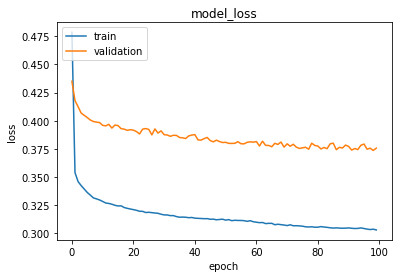

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
print('\n# Evaluate ')
results = model.evaluate(X_train, y_train)
print('loss, mse, mae: ', results)


# Evaluate 
1514/1514 [==============================] - 3s 2ms/step - loss: 0.3166 - mse: 0.3166 - mae: 0.3389
loss, mse, mae:  [0.3165723383426666, 0.3165723383426666, 0.338905394077301]


In [ ]:
Xnew = pretty_data_predict.drop(columns=['Price'])
#X_new = scaler.transform(Xnew)
ynew = model.predict(Xnew)
#y_new = scaler.inverse_transform(ynew)

In [ ]:
Xnew = pd.DataFrame(Xnew)
Xnew = Xnew.reset_index()
ynew = pd.DataFrame(ynew, columns=['Price'])
data_predict  = pd.concat([Xnew,ynew],axis=1)
#data_predict[['Rooms','Price', 'Propertycount','Distance']] = scaler.transform(Xnew[['Rooms','Price', 'Propertycount','Distance']])

#print("Predict", data_predict.head())

In [ ]:
data_predict.head()

,index,Rooms,Propertycount,Distance,Type t,Type u,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,Price
0,8,3.0,-0.811671,0.268041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.323975
1,15,1.0,0.138428,0.422680,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.162034
2,24,1.0,-0.620524,-0.123711,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.585512
3,29,1.0,-0.939158,0.525773,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.101044
4,38,0.0,0.168103,-0.175258,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.215756


In [ ]:
data_predict['Rooms'].unique()

array([ 3.,  1.,  0., -1.,  2., -2.,  4.,  9.,  5.,  7.,  6.])

In [ ]:
data_predict[['Rooms','Price', 'Propertycount','Distance']] = scaler.inverse_transform(data_predict[['Rooms','Price', 'Propertycount','Distance']])

In [ ]:
data_predict.head()

,index,Rooms,Propertycount,Distance,Type t,Type u,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,Price
0,8,6.0,1899.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.356151e+05
1,15,4.0,7630.0,15.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.327794e+05
2,24,4.0,3052.0,10.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.781307e+06
3,29,4.0,1130.0,16.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.693735e+05
4,38,3.0,7809.0,9.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.559454e+06


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
data_predict.head()

,index,Rooms,Propertycount,Distance,Type t,Type u,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,Price
0,8,6.00,1899.00,14.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,635615.06
1,15,4.00,7630.00,15.50,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,732779.40
2,24,4.00,3052.00,10.20,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1781307.15
3,29,4.00,1130.00,16.50,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,769373.45
4,38,3.00,7809.00,9.70,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1559453.56
